# Modèle à deux couche 
Nous allons appliqué les calcules réalisé sur les modèle multicouche et les appliquer ici sur un modèle à deux couche pous se faire nous allons modifier les différentes fonctions composant notre neurone 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
from sklearn.datasets import *
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

## Fonction d'initialisation modèle deux couche
Nous allons adapter la fonction d'initalisation pour un modèle deux couche car dans le neurone nous faision appel seulement à 1 parametre W et b ce qui n'est plus le cas dans le modèle deux couche

In [3]:
def initialisation(n0, n1, n2): #Correspond au dimension voir feuille de calcul
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }
    
    return parametres 

## Forward-Propagation 
Nous allons modifier la fonction dite modèle en Forward-Propagation comme nous l'avons vu dans nos feuille de calcul

In [4]:
def forward_propagation(X, parametres):
    W1 = parametres["W1"]
    b1 = parametres["b1"]
    W2 = parametres["W2"]
    b2 = parametres["b2"]
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        "A1" : A1,
        "A2" : A2
    }
    
    return activations

## Back-Propagation
Nous allons crée une fonctions qui calculeras nos gradients de la Back-propagation pour plus d'info voir feuille de calcule  

In [5]:
def back_propagation(X, y, activations, parametres):
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = parametres["W2"]
    
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True) #Keepdims assure que db2 garde les dimension voulue 
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2
    }
    
    return gradients

## Fonctions update modèle deux couches
Nous allons mettre à jour la fonction update pour un modèle deux couche en implémentant tous nos calcule 

In [6]:
def update(gradients, parametres, learning_rate):
    W1 = parametres["W1"]
    b1 = parametres["b1"]
    W2 = parametres["W2"]
    b2 = parametres["b2"]
    
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    
    parametres = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }
    
    return parametres

### Fonction prédicte
Nous allons réécrire la fonction prédict 

In [7]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations["A2"]
    return A2 >= 0.5

## Réseau de neurone à deux couches 
Nous allons écrire la fonction qui sera notre modèle à deux couche 

In [8]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000, graph=False, data=False):
    # initialisation des paramètre
    n0 = X_train.shape[0]
    # n1 est le nombre de neurone de la première couche 
    # donc on laisse le choix de celui-ci dans les parametres
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations["A2"]))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
            # nous utilisons flatten pour applatir notre tableau de 2 dimension en 1
            # Cela nous permet d'éviter d'éventuel problème
        
        


    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="Train acc")
    plt.legend()
    plt.show()
    
    if graph and data :
        visualisation(parametres, data)

    return parametres

# Teste de notre modèle à deux couches
Nous allons tester l'efficacité de notre modèle en le confrontant à différent Datasets

## Création d'un fonction de visualisation
Nous allons crée une fonction qui nous permettra de visualiser nos données une fois le modèle entrainé ce qui nous donnera un aperçu visuel de ses performances 

In [9]:
def visualisation(parametres, data):
    fig, ax = plt.subplots()
    ax.scatter(data[0], data[1], c=data[2], cmap=data[3])
    # Création d'une visualisation de données
    x0_lim = ax.get_xlim()
    x1_lim = ax.get_ylim()

    resolution = 100
    x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
    x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)

    #meshgrid 
    X0, X1 = np.meshgrid(x0, x1)

    # assemble (100, 100) -> (10000, 2)
    XX = np.vstack((X0.ravel(), X1.ravel()))

    Z = predict(XX, parametres)
    Z = Z.reshape((resolution, resolution))
        
    ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder= -1)
    ax.contour(X0, X1, Z, colors='red')
    plt.show()
    

## Dataset
Nous allons géner un dataset 

dimensions de X: (2, 100)
dimensions de y: (1, 100)


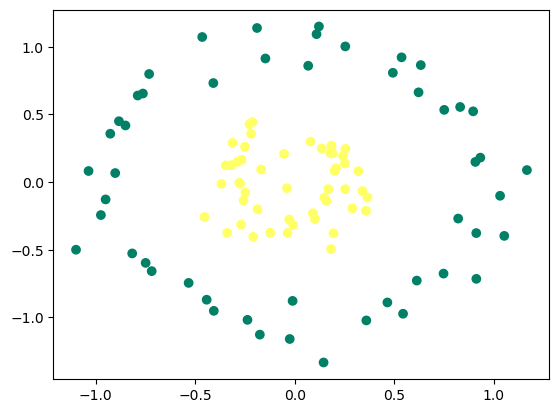

In [10]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

data = [X[0, :], X[1, :], y, 'summer']

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10478.35it/s]


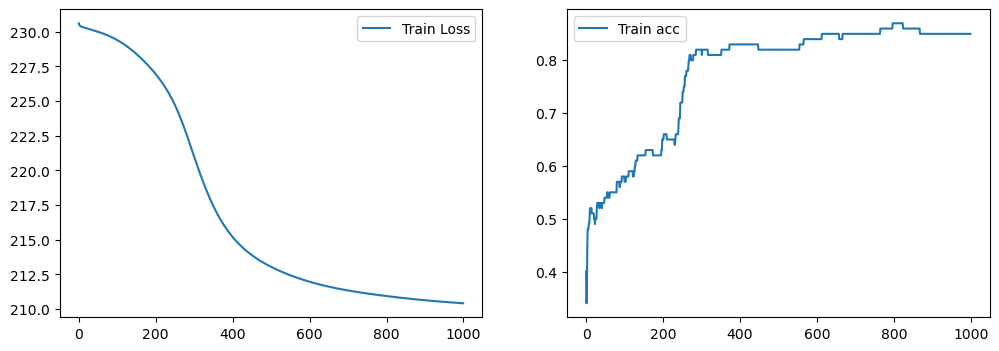

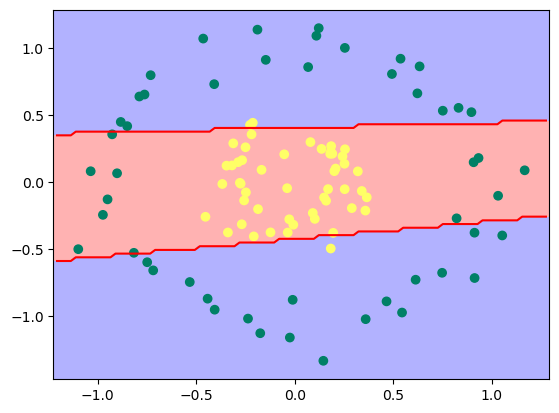

In [11]:
parametres = neural_network(X, y, n1=2, n_iter=10000, learning_rate=0.1, graph=True, data=data)

## Teste multiple
Nous allons testé d'autre génération en changeant les paramètres telles que le nombre de neurone le learning_rate et le nombre d'itération

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 9739.04it/s]


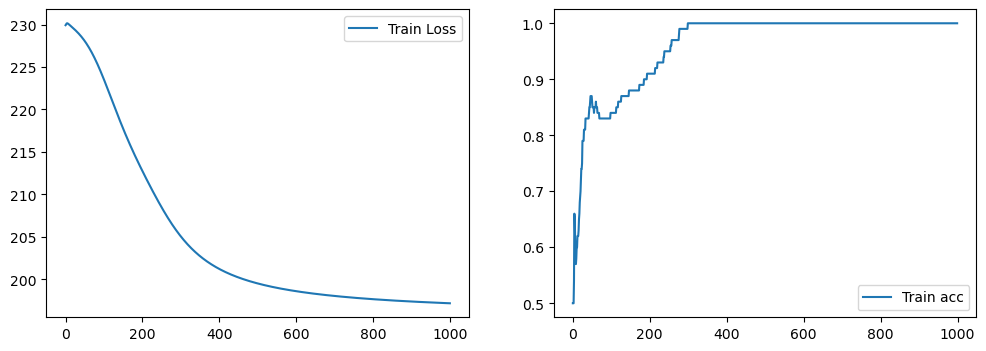

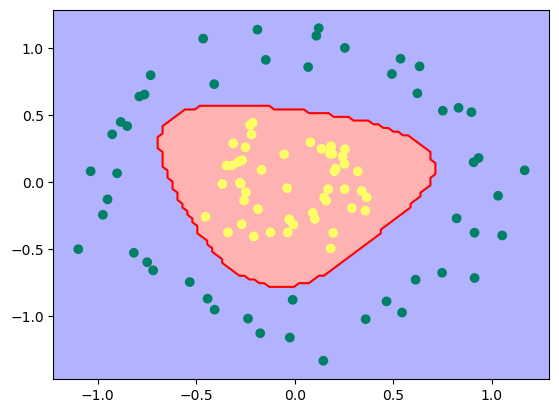

In [12]:
# 4 neurone et 10000 itération
parametres = neural_network(X, y, n1=4, n_iter=10000, learning_rate=0.1, graph=True, data=data)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 9980.10it/s]


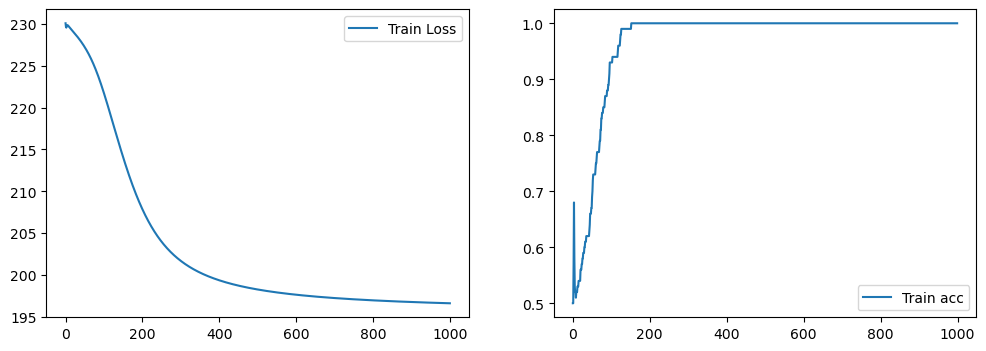

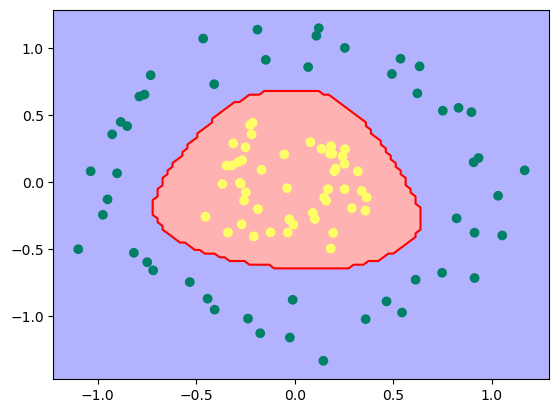

In [13]:
# 8 neurone
parametres = neural_network(X, y, n1=8, n_iter=10000, learning_rate=0.1, graph=True, data=data)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8382.77it/s]


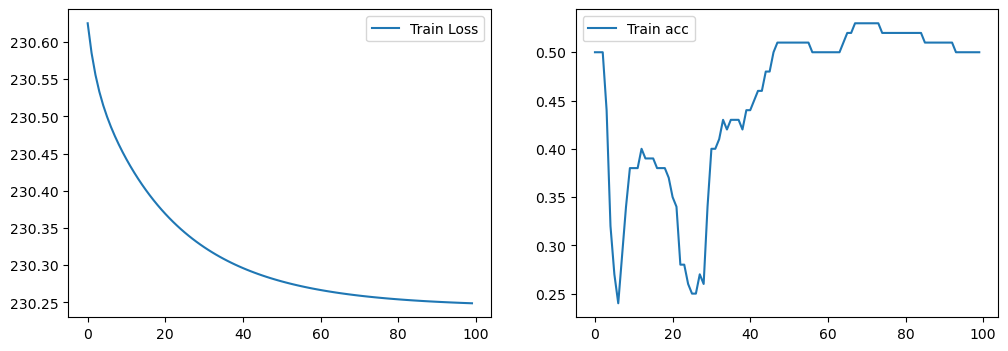

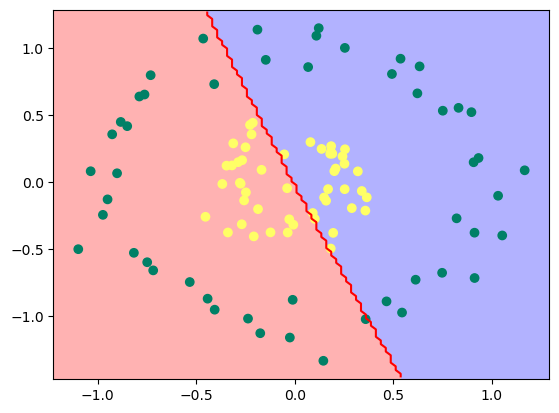

In [14]:
# 1000 itération et 2 neurone 
parametres = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1, graph=True, data=data)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8667.31it/s]


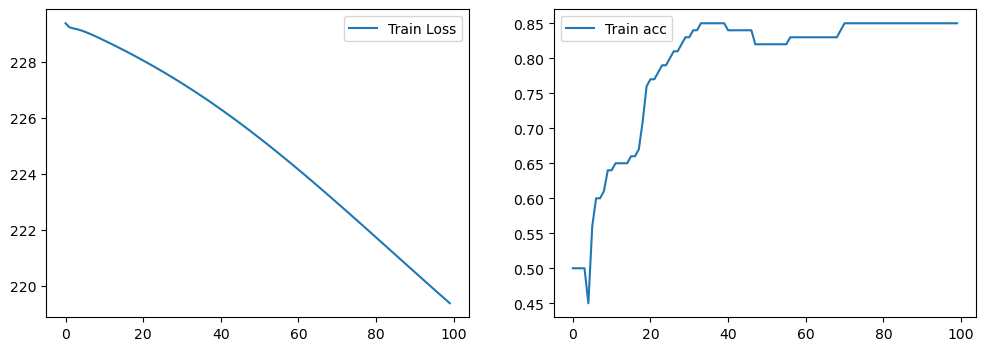

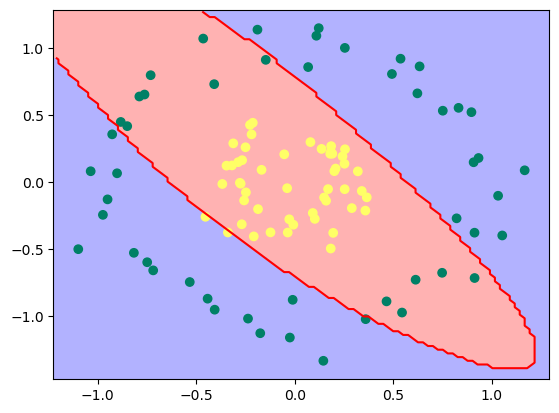

In [15]:
# 4 neurone
parametres = neural_network(X, y, n1=4, n_iter=1000, learning_rate=0.1, graph=True, data=data)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8271.68it/s]


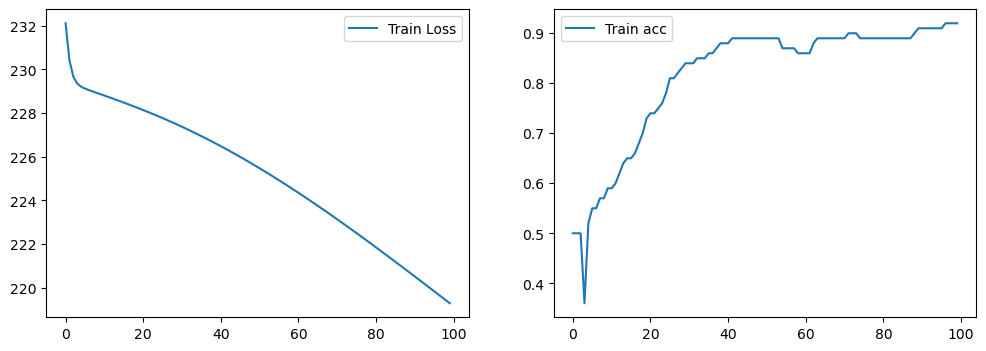

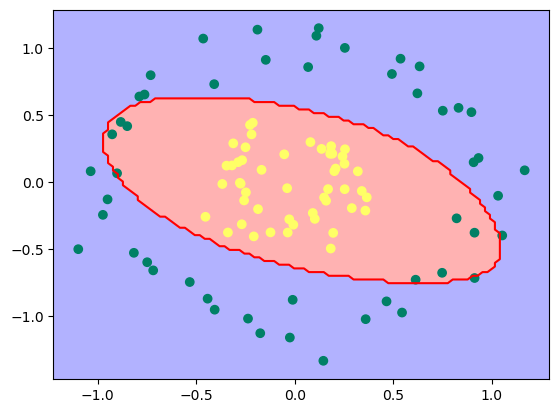

In [16]:
# 8 neurone 
parametres = neural_network(X, y, n1=8, n_iter=1000, learning_rate=0.1, graph=True, data=data)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7925.61it/s]


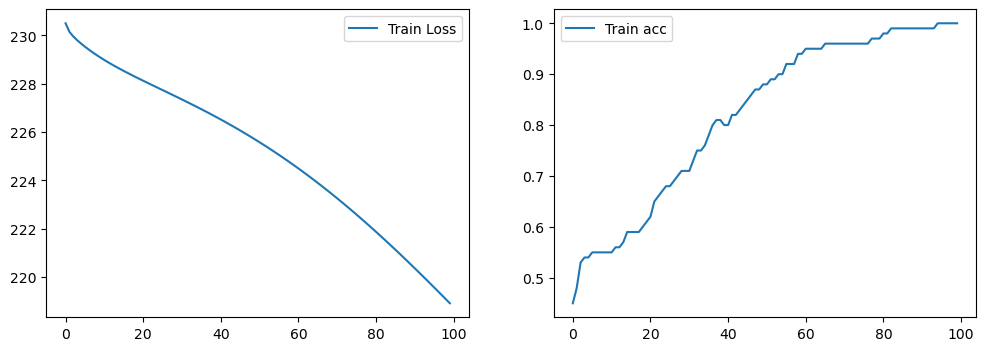

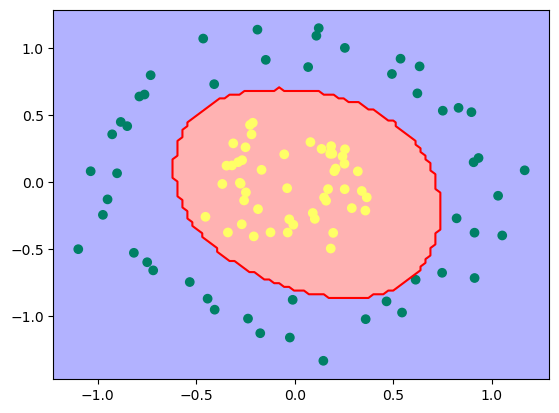

In [17]:
# 16 neurone
parametres = neural_network(X, y, n1=16, n_iter=1000, learning_rate=0.1, graph=True, data=data)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 7197.49it/s]


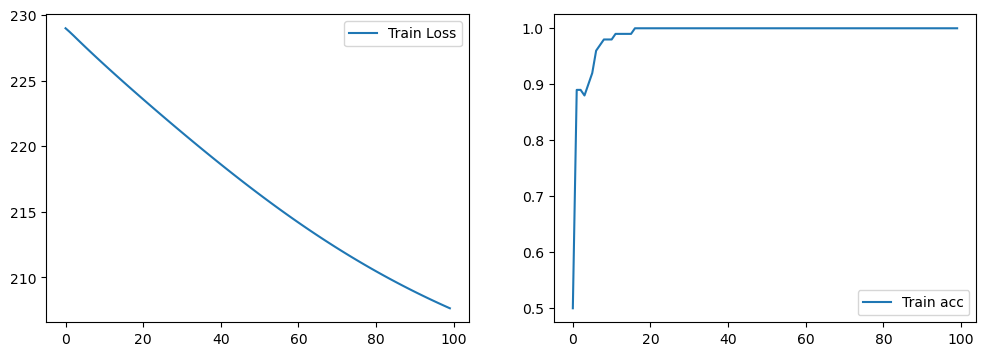

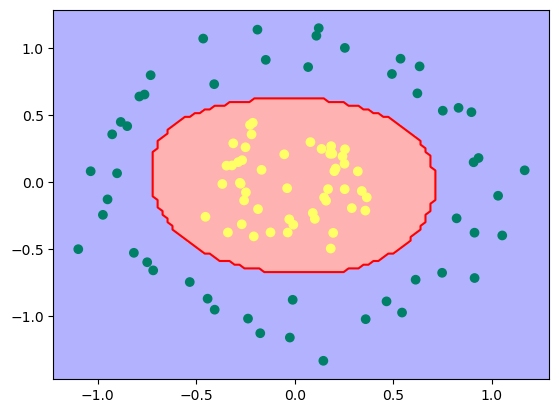

In [18]:
# 32 neurone
parametres = neural_network(X, y, n1=32, n_iter=1000, learning_rate=0.1, graph=True, data=data)

### Conclusion
Pour une meilleur éfficacité en moins d'itération il nous faut augmenter le nombre de neurone mais augmenter le nombre de neurone prend aussi plus de temps pour effectuer le calcule. nous allons généré un graphique de la précision du modèle en 1000 itération en fonction du nombre de neurone 

In [19]:
def neural_test(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):
    # initialisation des paramètre
    n0 = X_train.shape[0]
    # n1 est le nombre de neurone de la première couche 
    # donc on laisse le choix de celui-ci dans les parametres
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        
        # Train
        y_pred = predict(X_train, parametres)
        train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
        
        

    return train_acc

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1826.98it/s]


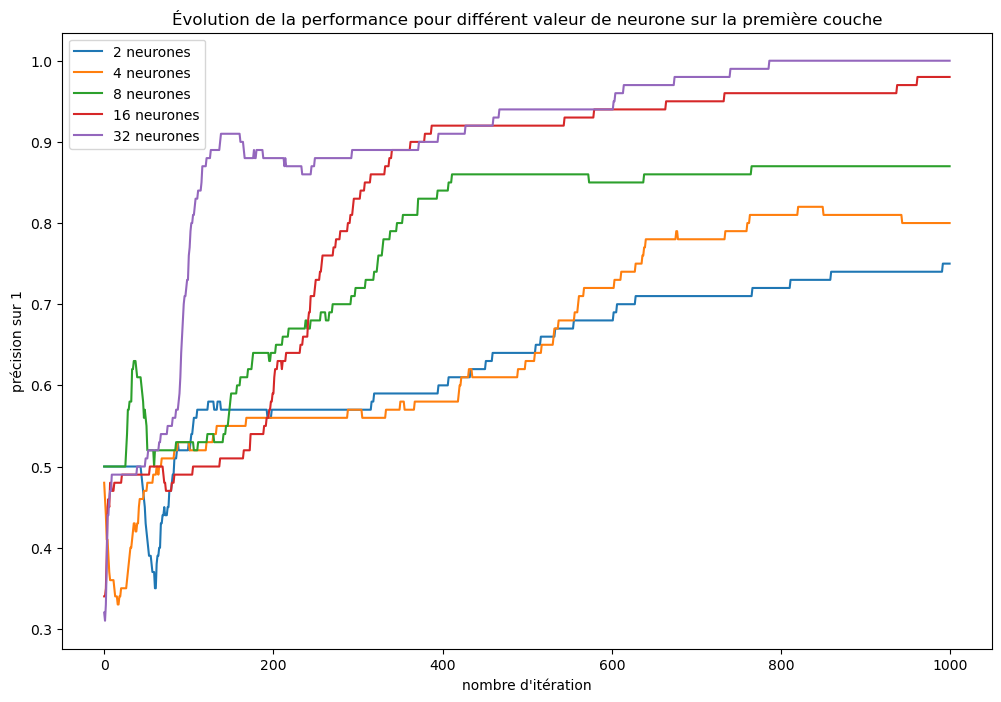

In [56]:
neurone = [2, 4, 8, 16, 32]
a = 0
plt.figure(figsize=(12,8))
plt.title('Évolution de la performance pour différent valeur de neurone sur la première couche')
plt.xlabel("nombre d'itération")
plt.ylabel("précision sur 1")

for i in neurone :
    train = neural_test(X, y, n1=i, n_iter=1000, learning_rate=0.1)
    a += 1
    plt.plot(train, label=f"{i} neurones")
plt.legend()
plt.show()
    

Notez que cela dépend aussi de l'aléatoir ses courbe peuvent être plus ou moins précise à chaque fois que nous relançons un entrainement.

**Exemple sur 10.000 itération pour que le résultat soit plus stable :**

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3982.32it/s]


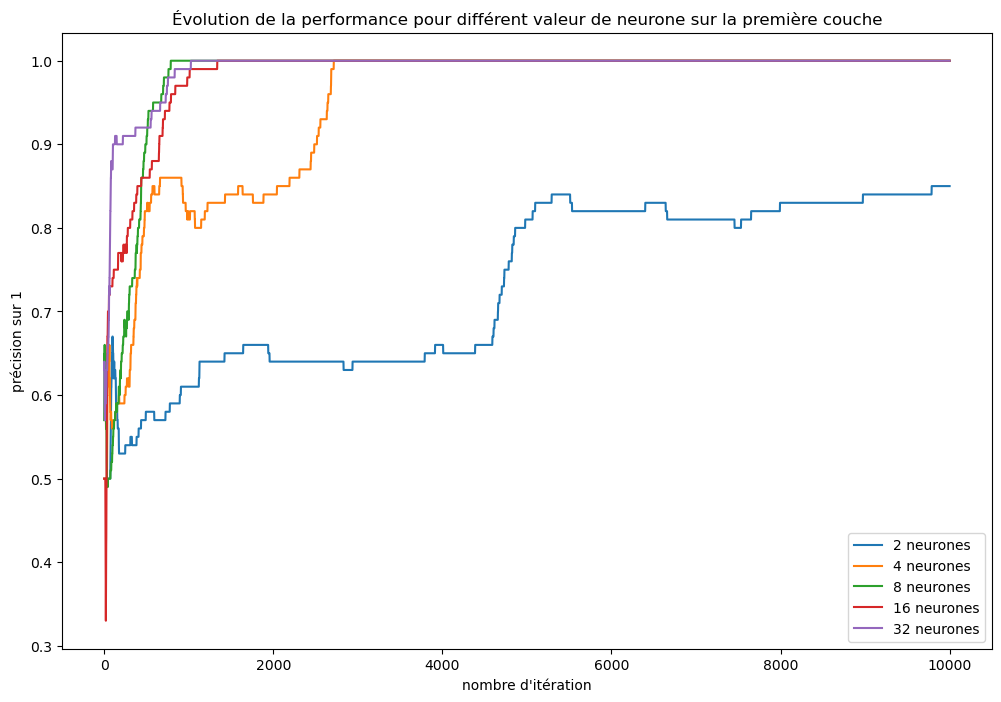

In [21]:
neurone = [2, 4, 8, 16, 32]
a = 0
plt.figure(figsize=(12,8))
plt.title('Évolution de la performance pour différent valeur de neurone sur la première couche')
plt.xlabel("nombre d'itération")
plt.ylabel("précision sur 1")

for i in neurone :
    train = neural_test(X, y, n1=i, n_iter=10000, learning_rate=0.1)
    a += 1
    plt.plot(train, label=f"{i} neurones")
plt.legend()
plt.show()

# Test de notre modèle sur notre problème d'image 
Nous avons précédament utiliser des image de chien et de chat sur notre modèle à 1 neurone pour tester sont éfficacité. Nous allons faire de même avec ce modèle.
## Génération des donnés
Nous allons généré et adapter les donnés pour pouvoir les faire rentrer dans notre modèle.

In [55]:
from utilities import *

X_train, y_train, X_test, y_test = load_data()

plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'utilities'

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'X_train' is not defined

In [58]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_train.max()

m_train = 300
m_test = 80

X_train_reshape = X_train_reshape[:, :m_train]
X_test_reshape = X_test_reshape[:, :m_test]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

NameError: name 'y_train' is not defined

## Adaptation du modèle
Nous devons juste adapter le modèle avant de pouvoir l'utiliser 

In [59]:
def neural_network2(X_train, y_train, X_test, y_test, n1, learning_rate = 0.05, n_iter = 300):
    # initialisation des paramètres
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations["A2"]))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
            
            # Test
            A_test = forward_propagation(X_test, parametres)
            test_loss.append(log_loss(y_test, A_test["A2"]))
            y_pred = predict(X_test, parametres)
            test_acc.append(accuracy_score(y_test.flatten(), y_pred.flatten()))
            
    y_pred = predict(X_train, parametres)
    print(f"train accuracy: {accuracy_score(y_train.flatten(), y_pred.flatten())}")
    y_pred = predict(X_test, parametres)
    print(f"test accuracy {accuracy_score(y_test.flatten(), y_pred.flatten())}")


    plt.figure(figsize=(12,4))
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(test_loss, label="Test Loss")
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(train_acc, label="Train acc")
    plt.plot(test_acc, label="Test acc")
    plt.legend()
    
    plt.show()

    return parametres


# Test sur le dataset
Nous allons maintenant tester 

In [60]:
parametres1 = neural_network2(
    X_train_reshape, y_train, X_test_reshape, y_test, 
    n1=32, learning_rate=0.01, n_iter=10000
)

NameError: name 'X_train_reshape' is not defined

# Conclusion
Notre modèle est déja plus performant même si nous avons vers la fin un cas d'overfitting. Si nous voulons améliorer les résultat il faudrait plus de couche à notre modèle. Ce modèle est déja plus performant qu'un modèle linérair mais ne peut pas encore être qualifié de modèle profond car nous sommes actuellement qu'à deux couche de neurone ou la première couche est modifiable et la dernière contient un seul neurone. ce qui ne permet pas au model de bien apprendre face à des cituations de reconnaissance d'image.